In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


In [2]:
data_frame = pd.read_csv('Training.csv')
data_frame.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [3]:
data_frame.dropna(how='all', axis=1, inplace=True)
data_frame.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


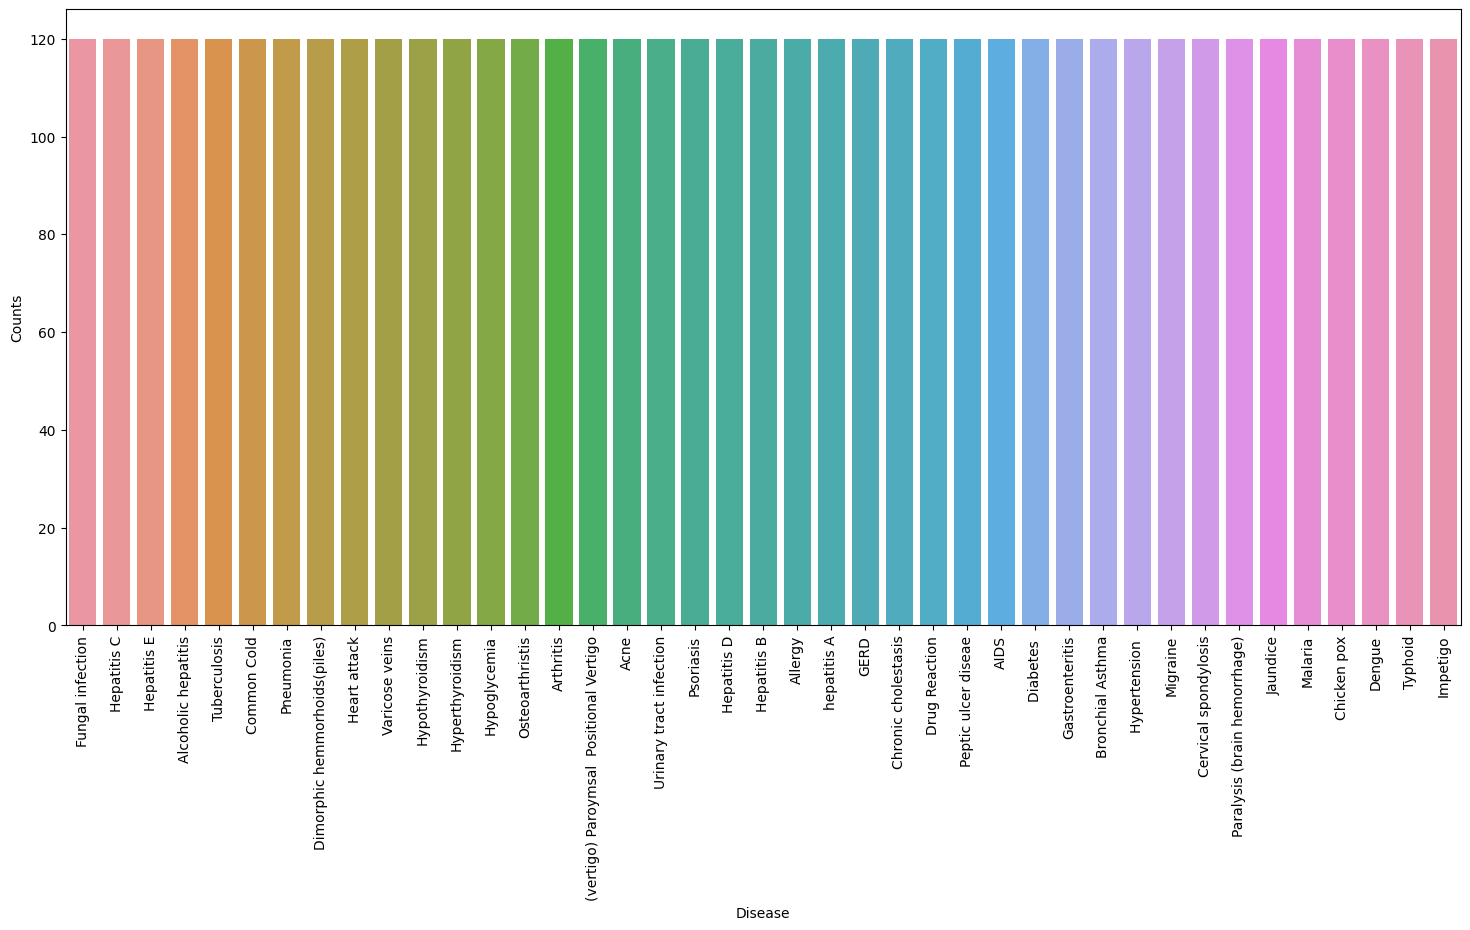

In [4]:
disease_count = data_frame["prognosis"].value_counts()
temp_data = pd.DataFrame({
    "Disease": disease_count.index,
    "Counts": disease_count.values
})

plt.figure(figsize=(18, 8))
sns.barplot(x="Disease", y="Counts", data=temp_data)
plt.xticks(rotation=90)
plt.show()


In [5]:
# data_frame.drop_duplicates(inplace=True)
# data_frame.shape
# disease_count = data_frame["prognosis"].value_counts()
# temp_data = pd.DataFrame({
#     "Disease": disease_count.index,
#     "Counts": disease_count.values
# })

# plt.figure(figsize=(18, 8))
# sns.barplot(x="Disease", y="Counts", data=temp_data)
# plt.xticks(rotation=90)
# plt.show()


In [6]:
null = data_frame["prognosis"].isnull()
print(null)


0       False
1       False
2       False
3       False
4       False
        ...  
4915    False
4916    False
4917    False
4918    False
4919    False
Name: prognosis, Length: 4920, dtype: bool


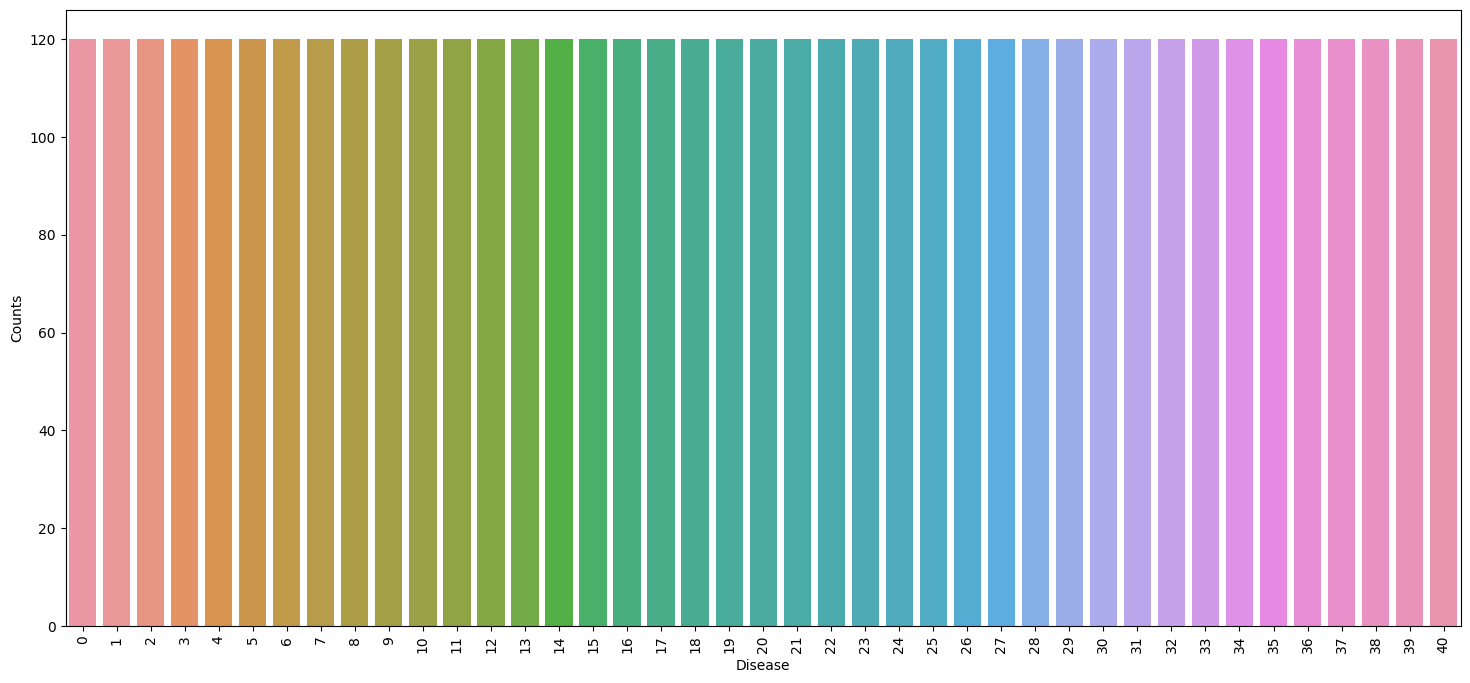

In [7]:
lbl_encode = preprocessing.LabelEncoder()
data_frame["prognosis"] = lbl_encode.fit_transform(data_frame["prognosis"])
disease_count = data_frame["prognosis"].value_counts()
temp_data = pd.DataFrame({
    "Disease": disease_count.index,
    "Counts": disease_count.values
})

plt.figure(figsize=(18, 8))
sns.barplot(x="Disease", y="Counts", data=temp_data)
plt.xticks(rotation=90)
plt.show()


In [8]:
data_frame.isnull().shape[0]
print("Non-missing values: " + str(data_frame.isnull().shape[0]))
print("Missing values: " +
      str(data_frame.shape[0] - data_frame.isnull().shape[0]))


Non-missing values: 4920
Missing values: 0


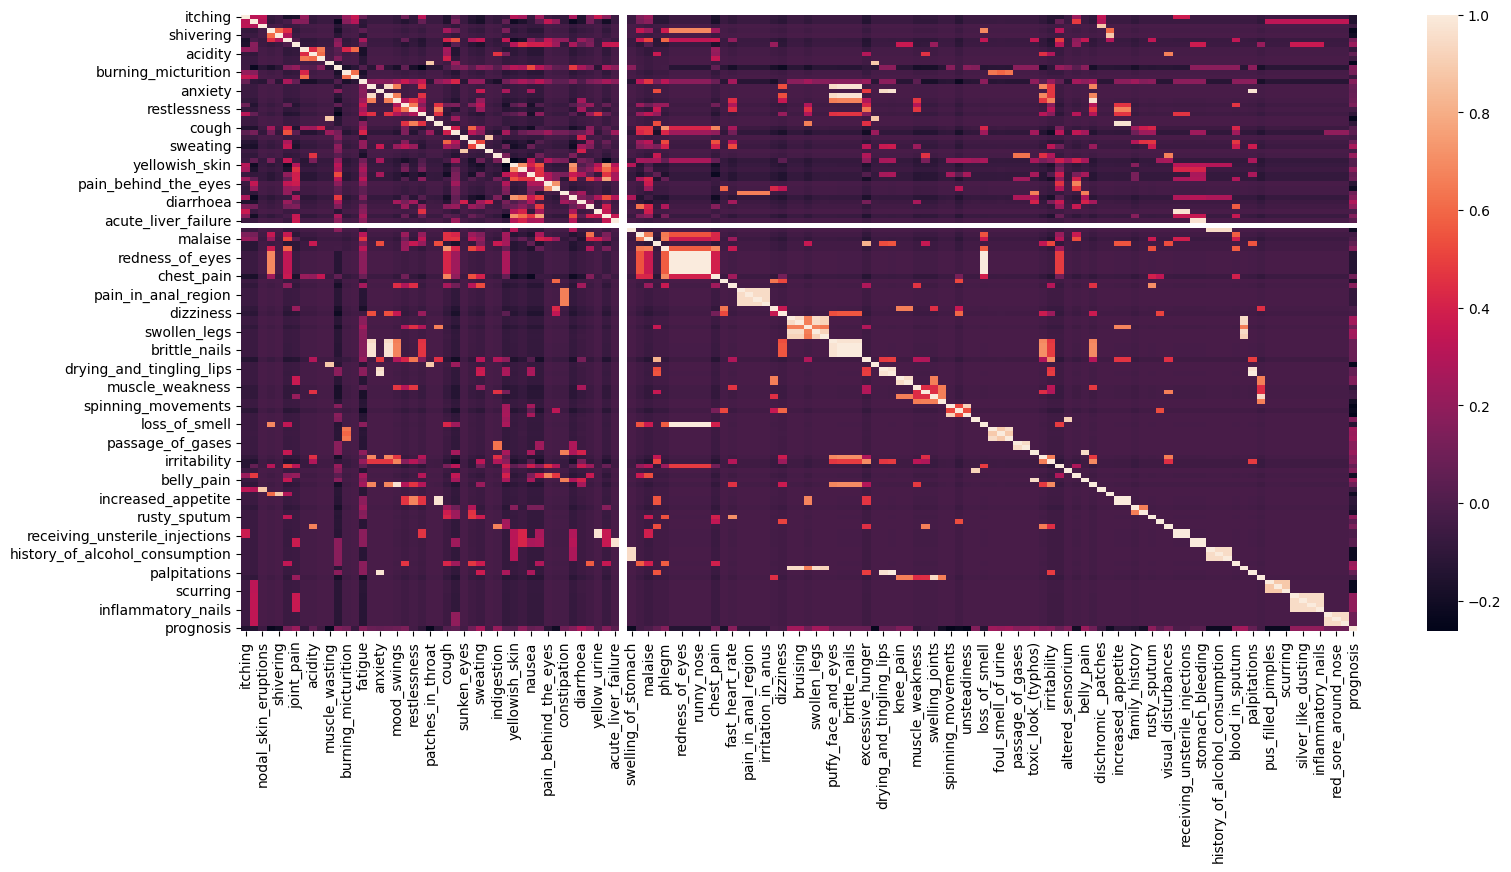

In [9]:
plt.figure(figsize=(18, 8))
plot = sns.heatmap(data_frame.corr())
plt.show()


In [10]:
A = data_frame.iloc[:, :-1]
B = data_frame.iloc[:, -1]
A_train, A_test, B_train, B_test = train_test_split(
    A, B, test_size=0.2, random_state=42)


print(A_train.shape)
print(A_test.shape)
print(B_train.shape)
print(B_test.shape)


(3936, 132)
(984, 132)
(3936,)
(984,)


In [11]:
def cvscore(model, X, y):
    return accuracy_score(y, model.predict(X))


models = {
    "RandomForest": RandomForestClassifier(random_state=42, max_depth=7),
    "KNeighbors": KNeighborsClassifier(),
    "SVC": SVC()
}

for model in models:
    scores = cross_val_score(
        models[model], A, B, cv=10, n_jobs=-1, scoring=cvscore)
    print(model)
    print(f"Scores:{scores}")
    print(f"Mean Score : {np.mean(scores)}")
    print()


RandomForest
Scores:[0.99796748 0.99796748 1.         1.         0.99796748 1.
 1.         1.         1.         1.        ]
Mean Score : 0.999390243902439

KNeighbors
Scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score : 1.0

SVC
Scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score : 1.0



In [12]:
def plot_confusion_matrix(model, test, pred):
    cf_matrix = confusion_matrix(test, pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cf_matrix, annot=True)
    plt.title(f"Confusion Matrix for {model} on Test Data")
    plt.show()


F1 score on train data by RandomForestClassifier: 0.966417094134377
F1 score on test data by RandomForestClassifier: 0.9536960690700822
Accuracy score on test data by RandomForestCLassifier: 97.40853658536585
Accuracy score on test data by RandomForestCLassifier: 96.34146341463415


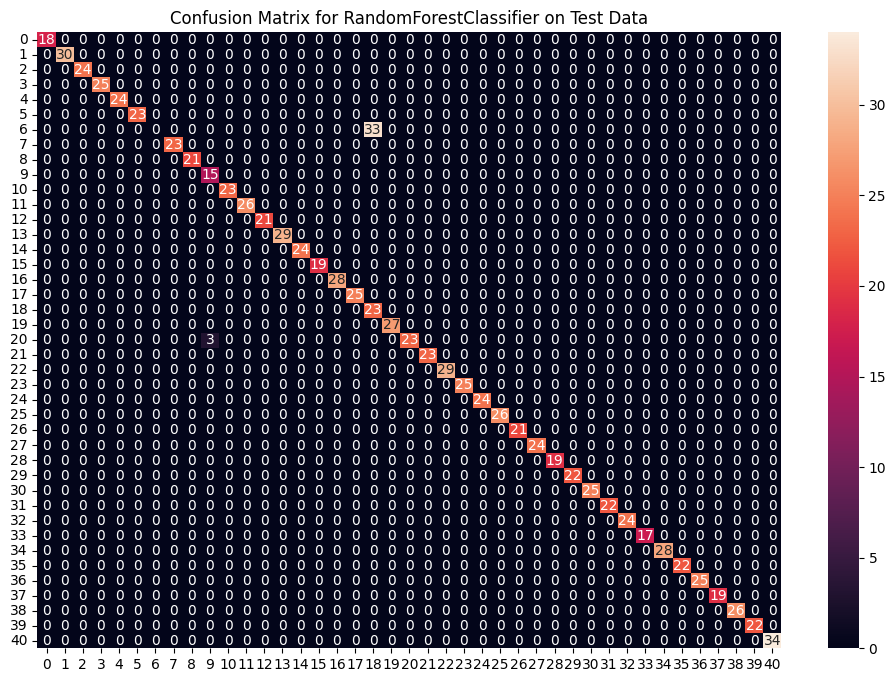

In [13]:
rand_forest = RandomForestClassifier(max_depth=7)
rand_forest.fit(A_train, B_train)
RF_prediction = rand_forest.predict(A_test)


print(
    f"F1 score on train data by RandomForestClassifier: {f1_score(B_train,rand_forest.predict(A_train),average='weighted')}")
print(
    f"F1 score on test data by RandomForestClassifier: {f1_score(B_test,rand_forest.predict(A_test),average='weighted')}")

print(
    f"Accuracy score on test data by RandomForestCLassifier: {accuracy_score(B_train,rand_forest.predict(A_train))*100}")
print(
    f"Accuracy score on test data by RandomForestCLassifier: {accuracy_score(B_test,rand_forest.predict(A_test))*100}")
plot_confusion_matrix("RandomForestClassifier", B_test, RF_prediction)


F1 score on train data by SVC: 1.0
F1 score on test data by SVC: 1.0
Accuracy score on train data by SVC: 100.0
Accuracy score on test data by SVC: 100.0


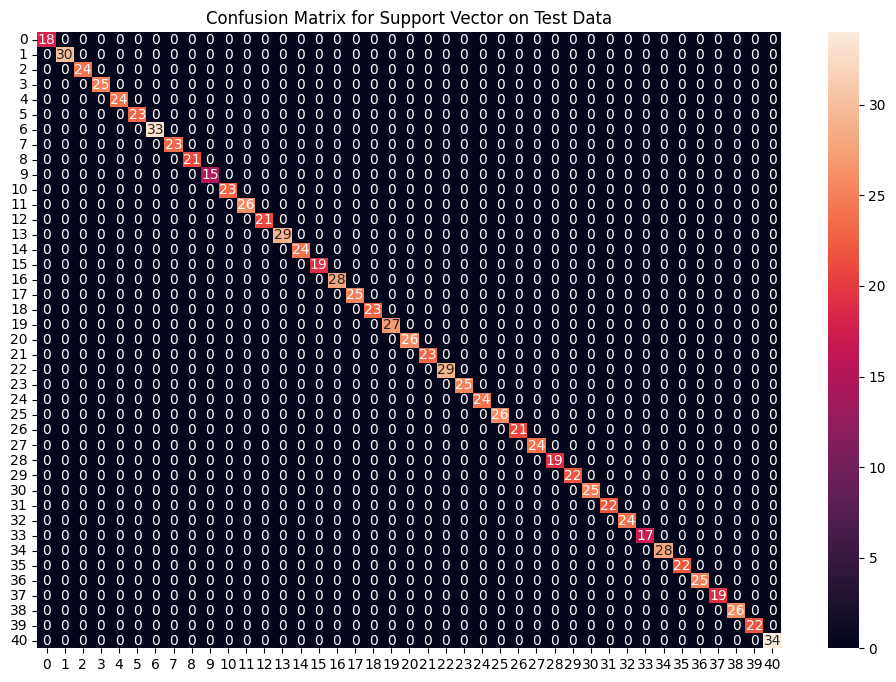

In [14]:
supp_vector = SVC()
supp_vector.fit(A_train, B_train)
svc_prediction = supp_vector.predict(A_test)

print(
    f"F1 score on train data by SVC: {f1_score(B_train,supp_vector.predict(A_train),average='weighted')}")
print(
    f"F1 score on test data by SVC: {f1_score(B_test,supp_vector.predict(A_test),average='weighted')}")

print(
    f"Accuracy score on train data by SVC: {accuracy_score(B_train,supp_vector.predict(A_train))*100}")
print(
    f"Accuracy score on test data by SVC: {accuracy_score(B_test,supp_vector.predict(A_test))*100}")
plot_confusion_matrix("Support Vector", B_test, svc_prediction)


F1 score on train data by KNeighborsClassifier: 1.0
F1 score on test data by KNeighborsClassifier: 1.0
Accuracy score on train data by KNeighborsClassifier: 100.0
Accuracy score on test data by KNeighborsClassifier: 100.0


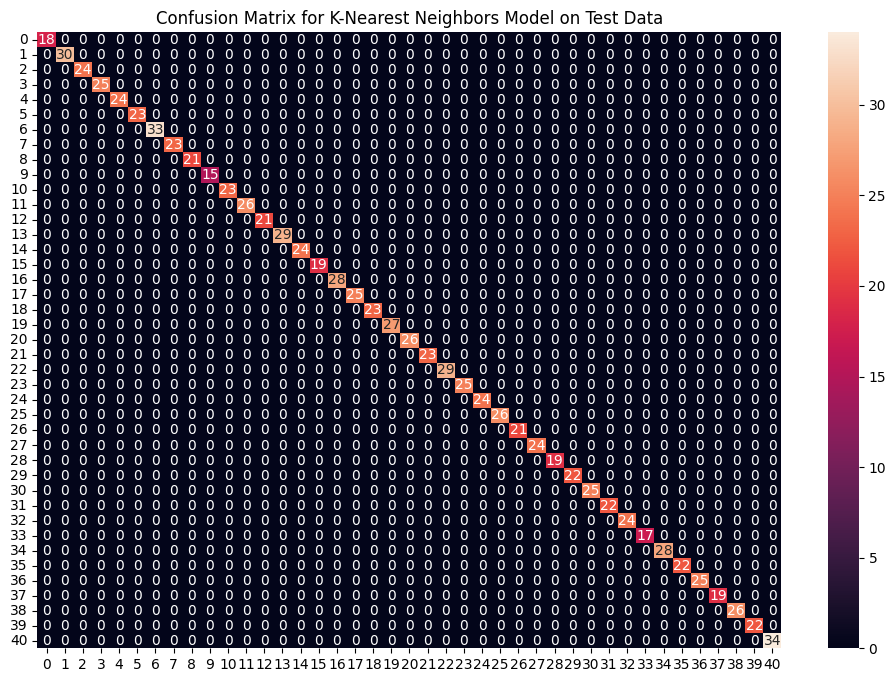

In [15]:
KNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN.fit(A_train, B_train)
KNN_prediction = KNN.predict(A_test)

print(
    f"F1 score on train data by KNeighborsClassifier: {f1_score(B_train,KNN.predict(A_train),average='weighted')}")
print(
    f"F1 score on test data by KNeighborsClassifier: {f1_score(B_test,KNN.predict(A_test),average='weighted')}")

print(
    f"Accuracy score on train data by KNeighborsClassifier: {accuracy_score(B_train,KNN.predict(A_train))*100}")
print(
    f"Accuracy score on test data by KNeighborsClassifier: {accuracy_score(B_test,KNN.predict(A_test))*100}")
plot_confusion_matrix("K-Nearest Neighbors Model", B_test, KNN_prediction)


In [16]:
test_data = pd.read_csv("Testing.csv").dropna(axis=1)
X_test = test_data.iloc[:, :-1]
Y_test = lbl_encode.transform(test_data.iloc[:, -1])


In [17]:
import pickle
symptoms = A.columns.values
# print(symptoms)
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

# print(symptom_index)
data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": lbl_encode.classes_
}
# print(data_dict)
pickle.dump(data_dict, open('predictor.pkl', 'wb'))


In [18]:
def predict_disease(symptoms):
    symptoms = symptoms.split(",")

    input_data = [0]*len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    input_data = np.array(input_data).reshape(1, -1)

    knn_prediction = data_dict["predictions_classes"][KNN.predict(input_data)[
        0]]
    rf_prediction = data_dict["predictions_classes"][rand_forest.predict(input_data)[
        0]]
    svc_prediction = data_dict["predictions_classes"][supp_vector.predict(input_data)[
        0]]

    predictions = {
        "svc_prediction": svc_prediction,
        "RF_prediction": rf_prediction,
        "KNN_prediction": knn_prediction,
    }

    print(predictions)


predict_disease(
    "Muscle Pain,Back Pain,Mild Fever,Redness Of Eyes,Red Spots Over Body,Nausea")


{'svc_prediction': 'Cervical spondylosis', 'RF_prediction': 'Common Cold', 'KNN_prediction': 'Cervical spondylosis'}


c:\Python\Python396\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Python\Python396\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python\Python396\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [19]:
def my_model():
    rand_forest = RandomForestClassifier(random_state=42, max_depth=7)
    rand_forest.fit(A_train, B_train)
    return rand_forest


F1 score on train data by RandomForestClassifier: 0.9984716545311058
F1 score on test data by RandomForestClassifier: 1.0
Accuracy score on train data by RandomForestCLassifier: 99.84756097560977
Accuracy score on test data by RandomForestCLassifier: 100.0


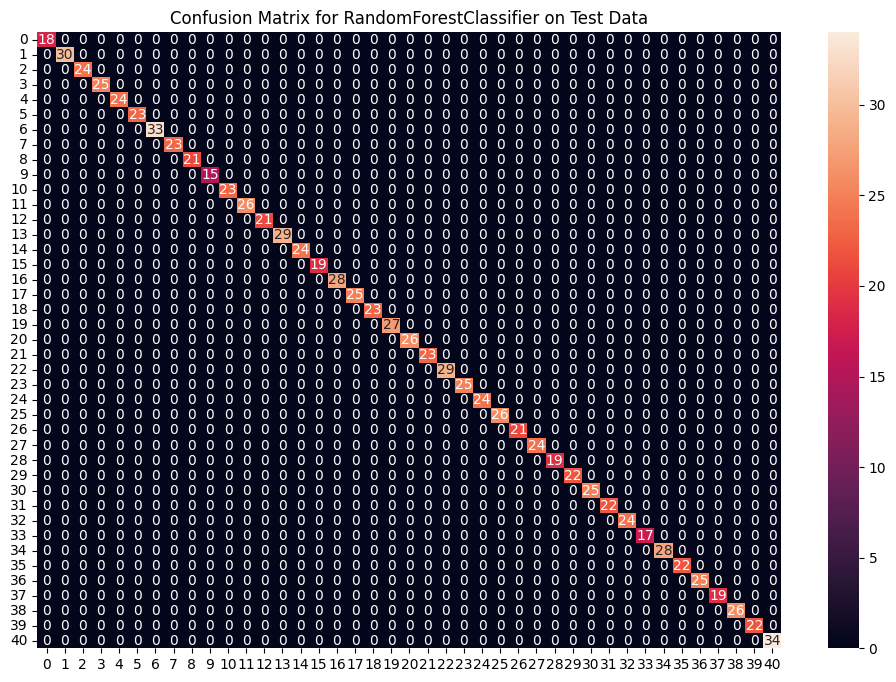

In [20]:
final_RF = my_model()
print(
    f"F1 score on train data by RandomForestClassifier: {f1_score(B_train,final_RF.predict(A_train),average='weighted')}")
print(
    f"F1 score on test data by RandomForestClassifier: {f1_score(B_test,final_RF.predict(A_test),average='weighted')}")

print(
    f"Accuracy score on train data by RandomForestCLassifier: {accuracy_score(B_train,final_RF.predict(A_train))*100}")
print(
    f"Accuracy score on test data by RandomForestCLassifier: {accuracy_score(B_test,final_RF.predict(A_test))*100}")
plot_confusion_matrix("RandomForestClassifier",
                      B_test, final_RF.predict(A_test))


In [21]:
def final_prediction(symptoms):
    # symptoms = symptoms.split(",")

    input_data = [0]*len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    input_data = np.array(input_data).reshape(1, -1)

    rf_prediction = data_dict["predictions_classes"][final_RF.predict(input_data)[
        0]]
    return rf_prediction


In [22]:
disease = final_prediction(["Muscle Pain","Back Pain","Mild Fever","Redness Of Eyes","Red Spots Over Body","Nausea"])
print(f"Predicted Disease: {disease}")

Predicted Disease: Dengue


c:\Python\Python396\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [23]:
# import pickle
# pickle.dump(final_RF, open('my_final_model.pkl', 'wb'))
